# 성능 평가 지표(Evaluation Metric)

## 회귀 모델의 경우

- 대부분 실제값과 예측값의 오차 평균값에 기반함

## 분류 모델의 경우

1. 정확도(Accuracy)

    - 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표
    - 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수
    - 이진 분류의 경우 데이터의 구성에 따라 머신러닝 모델의 성능을 왜곡할 수 있기 때문에 정확도 하나만 가지고 성능을 평가하지 않음
    - 특히, 불균형한(imbalanced) 레이블 값 분포에서 머신러닝 모델의 성능을 판단할 경우 적합한 평가지표가 아님
    

2. 오차행렬(Confusion Matrix, 혼동행렬)

    - 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 있는지도 함께 보여주는 지표
    - 일반적으로 불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 중점적으로 찾아야 하는 매우 적은 수의 결과값에 positive를 설정해 1값을 부여하고, 그렇지 않은 경우 negative로 0값을 부여하는 경우가 많음
    - 예를 들어, 사기 예측 모델에서는 사기 = positive 양성으로 1, 정상 = negative 음성으로 0
    - 암 예측 모델에서는  암이 양성일 경우(암 환자) = positive 양성으로 1, 암이 음성일 경우(암 아닐 경우) = negative 음성으로 0
    
    ![이미지](오차행렬.png)

    - TN: 예측값을 Negative값 0으로 예측했고 실제값 역시 Negative값 0
    - FP(type 1 error): 예측값을 Positive값 1로 예측했는데 실제값은 Negative값 0. 임신을 안했는데 임신을 했다고 잘못 예측
    - FN(type 2 error): 예측값을 Negative값 0으로 예측했는데 실제값은 Positive값 1. 임신을 했는데 임신을 안했다고 잘못 예측
    - TP: 예측값을 Positive값 1로 예측했는데 실제값 역시 Positive값 1
    - 오차행렬의 값을 조합해 정확도(Accuracy), 정밀도(Precision), 재현율(Recall)값을 알 수 있음
    - 정확도 = 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수 = (TN + TP) / (TN + FP + FN + TP)
    
    
3. 재현율(Recall, 민감도(sesitivity) 또는 TPR(true positive rate)) & 4. 정밀도(Precision)  

    - 정밀도와 재현율은 positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표
    - 재현율과 정밀도 모두 TP를 높이는 데 동일하게 초점을 맞추지만, 재현율은 FN(실제positive, 예측negative)를 낮추는데, 정밀도는 FP를 낮추는데 초점을 맞춤
    - 따라서, 재현율과 정밀도는 서로 보완적인 지표로 분류의 성능을 평가하는 데 적용됨
    - 가장 좋은 성능 평가는 재현율과 정밀도 모두 높은 수치를 얻는 것
    - 둘 중 어느 한 평가 지표만 매우 높고, 다른 수치는 매우 낮은 결과를 나타내는 경우는 바람직하지 않음
    - 재현율 = 실제값이 positive인 대상 중에 예측값과 실제값이 positive로 일치한 데이터의 비율 = TP / (FN + TP)
    - 정밀도 = 예측을 positive로 한 대상 중에 예측값과 실제값이 positive로 일치한 데이터의 비율 = TP / (FP + TP)
    
    
    - 정밀도와 재현율 중 이진 분류 모델의 업무 특성에 따라 특정 평가 지표가 더 중요한 지표로 간주될 수 있음
    - 재현율이 중요 지표인 경우 = 실제 positive 양성 데이터를 negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
        - 예를 들어, 암 예측 모델은 재현율이 매우 중요. 실제 positive인 암 환자를 positive 양성이 아닌 negative 음성으로 잘못 판단했을 경우 오류의 대가로 치료를 못 받을 수 있기 때문
        - 보험 사기와 같은 금융 사기 적발 모델도 재현율이 중요. 실제 금융거래 사기인 positive 건을 negative로 잘못 판단하게 되면 회사에 미치는 손해가 큼
    - 정밀도가 중요 지표인 경우 = 실제 negative 음성인 데이터 예측을 positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
        - 예를 들어, 스팸메일 여부를 판단하는 모델의 경우 실제 negative인 일반 메일을 positive인 스팸 메일로 분류할 경우에는 메일을 아예 받지 못하게 됨
    

5. F1 스코어

    - 정밀도와 재현율을 결합한 지표
    - 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐
    - 2 * precision * recall / precision + recall
    

6. ROC곡선과 AUC스코어

    - 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표
    - ROC곡선은 FPR(false positive rate)이 변할 때 TPR(true positive rate)이 어떻게 변하는지를 나타내는 곡선
    - FPR을 x축으로, TPR을 y축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타남
    - TPR = 재현율(민감도): 실제값 positive(양성)가 정확히 예측돼야 하는 수준을 나타냄(질병이 있는 사람은 질병이 있는 것으로 양성 판정)
    - TNR(true negative rate) = 특이성(specificity): 민감도에 대응하는 지표. 실제값 negative(음성)가 정확히 예측돼야 하는 수준을 나타냄(질병이 없는 건강한 사람은 질병이 없는 것으로 음성 판정)
    - TNR = TN / (FP + TN)
    - FPR = FP / (FP + TN) = 1 - TNR = 1 - 특이성
    - ROC곡선이 대각선이면 AUC는 0.5
    - ROC곡선이 가운데 직선에 가까울수록 성능이 떨어지는 것이며, 멀어질수록 성능이 뛰어남
    - ROC곡선은 FPR을 0부터 1까지 변경하면서 TPR의 변화값을 구함
    - FPR을 0부터 1까지 변경하는 방법 = 분류 결정 임계값 변경
        - 분류 결정 임계값은 positive 예측값을 결정하는 확률의 기준이기 때문에 FPR을 0으로 만들려면 임계값을 1로 지정하면 됨
        - 임계값을 1로 지정하면 positive 예측 기준이 매우 높기 때문에 classifier가 임계값보다 높은 확률을 가진 데이터를 positive로 예측할 수 없기 때문.
        - 아예 positive로 예측하지 않기 대문에 FP값이 0이 되어 FPR = 0이 됨
        - 반대로 FPR = 1로 만들려면 TN = 0으로 만들면 됨. 그러려면 분류 결정 임계값을 0으로 지정하면 됨
        - 그럼 분류기의 positive 확률 기준이 너무 낮아서 다 positive로 예측함
        - 그럼 negative예측이 없기 때문에 TN = 0이 되고 FPR = 1이 됨
        
        
    - AUC(area under curve): ROC곡선 밑의 면적을 구한 것. 1에 가까울수록 좋은 수치
    - AUC수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건
    - 가운데 직선에서 멀어지고 왼쪽 상단 모서리 쪽으로 가파르게 곡선이 이동할수록 직사각형에 가까운 곡선이 되어 면적이 1에 가까워지는 좋은 ROC AUC 성능 수치를 얻게 됨

#### 로지스틱 회귀를 이용한 타이타닉 생존자 예측의 성능 평가 지표

In [1]:
# 성능 평가 지표 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [2]:
# null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    return df

# 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df

# 레이블 인코딩 수행
from sklearn.preprocessing import LabelEncoder
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터 로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
df = pd.read_csv('train.csv')
y = df['Survived']
X = df.drop('Survived', axis = 1)
X = transform_features(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

lr_clf = LogisticRegression(solver = 'liblinear')     # solver의 기본값 = lbfgs. 데이터 세트가 상대적으로 크고 다중 분류인 경우 적합
                                 # solver = 'liblinear'은 보통 작은 데이터 세트이고 이진 분류인 경우 약간 성능이 더 좋은 경향이 있음
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
get_clf_eval(y_test, pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


## 정밀도/재현율 트레이드오프(Trade-off)

- 분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임계값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있음
- 하지만 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉬움
- 이를 정밀도/재현율 트레이드오프라고 함


- 일반적으로, 이진분류에서는 임곗값을 0.5로 정하고 이 기준값보다 확률이 크면 positive, 작으면 negative로 결정함
- 사이킷런은 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_proba()를 제공
- predict_proba() 메서드는 학습이 완료된 사이킷런 classifier 객체에서 호출기 가능하며 테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환함
- 반환값은 개별 클래스의 예측 확률을 ndarray m * n(m: 입력값의 레코드 수, n: 클래스 값 유형)형태로 반환
- 각 열은 개별 클래스의 예측확률. 이진 분류에서 첫번째 칼럼은 0 negative의 확률, 두번째 칼럼은 1 positive의 확률

In [4]:
import numpy as np

pred_proba = lr_clf.predict_proba(x_test)
pred = lr_clf.predict(x_test)
print('pred_proba() 결과 shape: {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n: ', pred_proba[:3])

# 예측 확률 array와 예측 결과값 array를 병합해 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis = 1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])     # 임계값 = 0.5

pred_proba() 결과 shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
:  [[0.44935226 0.55064774]
 [0.86335512 0.13664488]
 [0.86429644 0.13570356]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935226 0.55064774 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429644 0.13570356 0.        ]]


In [5]:
# Binarizer를 이용하면 지정된 Threshold보다 같거나 작으면 0값으로, 크면 1값으로 변환해 반환

from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값. 분류 결정 임곗값
custom_threshold = 0.5

# predict_proba() 반환값의 두번째 칼럼, 즉 positive 클래스 칼럼 하나만 추출해 Binarizer 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [6]:
# threshold값을 0.4로 변경

custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


- 임계값을 낮추니 재현율이 올라가고 정밀도가 떨어짐
- 왜냐하면 분류결정 임계값은 positive 예측값을 결정하는 확률의 기준이 되기 때문
- 확률이 0.5가 아닌 0.4부터 positive로 예측을 하였으므로 임계값을 낮출수록 True값이 많아지게 됨
- positive 예측값이 많아지면 상대적으로 재현율이 높아짐. 양성 예측을 많이 하다 보니 실제 양성을 음성으로 예측하는 횟수가 상대적으로 줄어들기 때문

In [9]:
# 임계값을 0.4 ~ 0.6까지 0.05씩 증가시키며 평가 지표 확인

# 테스트를 수행할 모든 임계값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list객체 내의 값을 차례로 iteration하면서 evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값: ', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        print()
        
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임계값:  0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197

임계값:  0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869

임계값:  0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705

임계값:  0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377

임계값:  0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213



### precision_recall_curve()을 이용한 타이타닉 예측 모델의 임계값별 정밀도와 재현율

#### 입력 파라미터
- y_true: 실제 클래스값 배열(배열 크기 = [데이터 건수])
- probas_pred: positive 칼럼의 예측 확률 배열(배열 크기 = [데이터 건수])

#### 반환값
- 정밀도: 임계값별 정밀도 값을 배열로 반환
- 재현율: 임계값별 재현율 값을 배열로 반환
- 일반적으로 0.11 ~ 0.95 정도의 임계값을 담은 넘파이 ndarray와 이 임계값에 해당하는 정밀도 및 재현율값을 담은 넘파이 ndarray를 반환

In [10]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률 추출
pred_proba_class1 = lr_clf.predict_proba(x_test)[:, 1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임계값 배열의 shape: ', thresholds.shape)

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임계값을 15step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개: ', thr_index)
print('샘플용 10개의 임계값: ', np.round(thresholds[thr_index], 2))

# 15step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임계값 배열의 shape:  (147,)
샘플 추출을 위한 임계값 배열의 index 10개:  [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값:  [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
샘플 임계값별 정밀도:  [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


- 임계값이 증가할수록 정밀도는 증가하고 재현율은 감소함

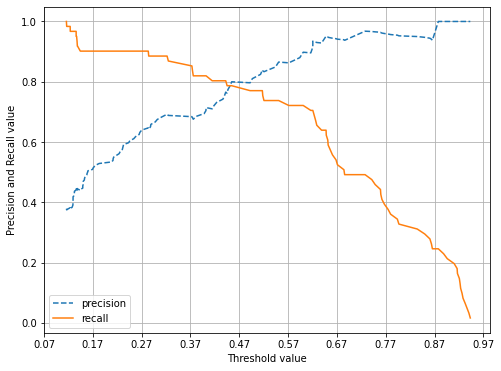

In [11]:
# 정밀도와 재현율의 임계값에 따른 값 변화 시각화

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # x축을 threshold값으로, y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    # threshold값 x축의 scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(x_test)[:, 1])

- 약 0.45지점에서 재현율과 정밀도가 비슷해짐

## F1스코어

- 위에서 학습/예측한 로지스틱 회귀 기반 타이타닉 생존자 모델의 F1스코어

In [12]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7966


In [13]:
# 타이타닉 생존자 예측에서 임계값을 변화시키면서 F1 스코어를 포함한 평가 지표 확인
# 위에서 작성한 get_eval_by_threshold()함수를 이용해 임계값 0.4 ~ 0.6별로 정확도, 정밀도, 재현율, F1 스코어 확인

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    # F1스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(x_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임계값:  0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1: 0.7576

임계값:  0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1: 0.7869

임계값:  0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1: 0.7966

임계값:  0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1: 0.7965

임계값:  0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1: 0.8000



## roc_curve()

### 입력 파라미터

- y_true: 실제 클래스 값 array(array shape = [데이터 건수])
- y_score: predict_proba()의 반환 값 array에서 positive 칼럼의 예측 확률이 보통 사용됨(array shape = [n_samples])

### 반환값

- fpr: fpr값을 array로 반환
- tpr: tpr값을 array로 반환
- thresholds: threshold 값 array

In [14]:
# roc_curve()를 이용해 타이타닉 생존자 예측 모델의 FPR, TPR, 임계값 구하기

from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률 추출
pred_proba_class1 = lr_clf.predict_proba(x_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임계값을 5step으로 추출
# thresholds[0]은 max(예측확률) + 1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임계값 배열의 index: ', thr_index)
print('샘플 index로 추출한 임계값: ', np.round(thresholds[thr_index], 2))

# 5step 단위로 추출된 임계값에 따른 FPR, TPR값
print('샘플 임계값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임계값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index:  [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임계값:  [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임계값별 FPR:  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임계값별 TPR:  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


- 임계값이 작아지면서 FPR이 점점 커짐. FPR이 커짐에 따라 TPR은 가파르게 커짐

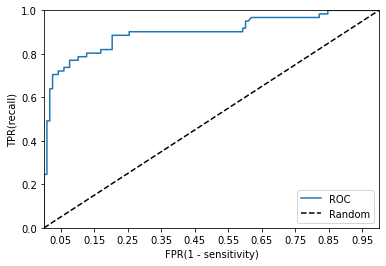

In [15]:
# FPR의 변화에 따른 TPR의 변화를 ROC곡선으로 시각화

def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR값을 반환
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    # ROC곡선
    plt.plot(fprs, tprs, label = 'ROC')
    
    # 가운데 대각선
    plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
    
    # FPR x축의 scale을 0.1단위로 변경, x, y축명 설정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1 - sensitivity)')
    plt.ylabel('TPR(recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:, 1])

- ROC 곡선 자체는 FPR과 TPR의 변화 값을 보는데 이용
- 분류의 성능 지표로 사용되는 것은 ROC곡선 면적에 기반한 AUC값

In [16]:
# AUC

from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(x_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC값: {0:.4f}'.format(roc_score))

ROC AUC값: 0.8987


In [17]:
# get_clf_eval()함수로 정확도, 정밀도, 재현율, F1스코어, ROC AUC값 출력

def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, 
                                                                                                recall, f1, roc_auc))
    
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1: 0.7966, AUC: 0.8987
